In [89]:
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import seaborn as sns
import matplotlib.pyplot as plt
from typing import List
from scipy.stats import linregress
from matplotlib.patches import Rectangle
from plot import load_logs, plot_runs, add_values_from_normal_runs, PV_MAP
# refresh files

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [90]:
PV_MAP = {
    "age": ("old","young"),
    "sex": ("male", "female")
}

In [91]:
BASE_DIR = "/home/getznerj/Documents/Thesis/Thesis Final Experiments"

# Baseline

In [92]:
log_dir = os.path.join(BASE_DIR, "baseline")
data = load_logs(log_dir = log_dir)

In [93]:
data_normal = [value for key, value in data.items() if "noDP" in key]
data_dp = [value for key, value in data.items() if not "noDP" in key]

In [94]:
def transform_and_melt(df):
    dp = df.iloc[0]["dp"]
    pv = df.iloc[0]["protected_attr"]
    metrics = [col for col in df.columns if "subgroupAUROC" in col]
    cols = metrics + ["protected_attr", "protected_attr_percent", "seed"]
    df = df[cols]
    df["protected_attr_percent"] = (df["protected_attr_percent"]*100).astype(int)
    df = df.rename(columns={metric: f'{PV_MAP[pv][1]}{"_DP" if dp else ""}' if PV_MAP[pv][1] in metric else f'{PV_MAP[pv][0]}{"_DP" if dp else ""}' for metric in metrics})
    df_melted = df.melt(id_vars=["protected_attr", "protected_attr_percent", "seed"], var_name="subgroup", value_name="s-AUC")
    return df_melted

In [95]:
test = transform_and_melt(data_normal[1])

In [96]:
data_normal = pd.concat([transform_and_melt(df) for df in data_normal], axis=0)

In [97]:
color_palette = {
    "old": "#0065BD",
    "young": "#005293",
    "male": "#808080",
    "female": "#CCCCC6"
}

(0.5, 1.0)

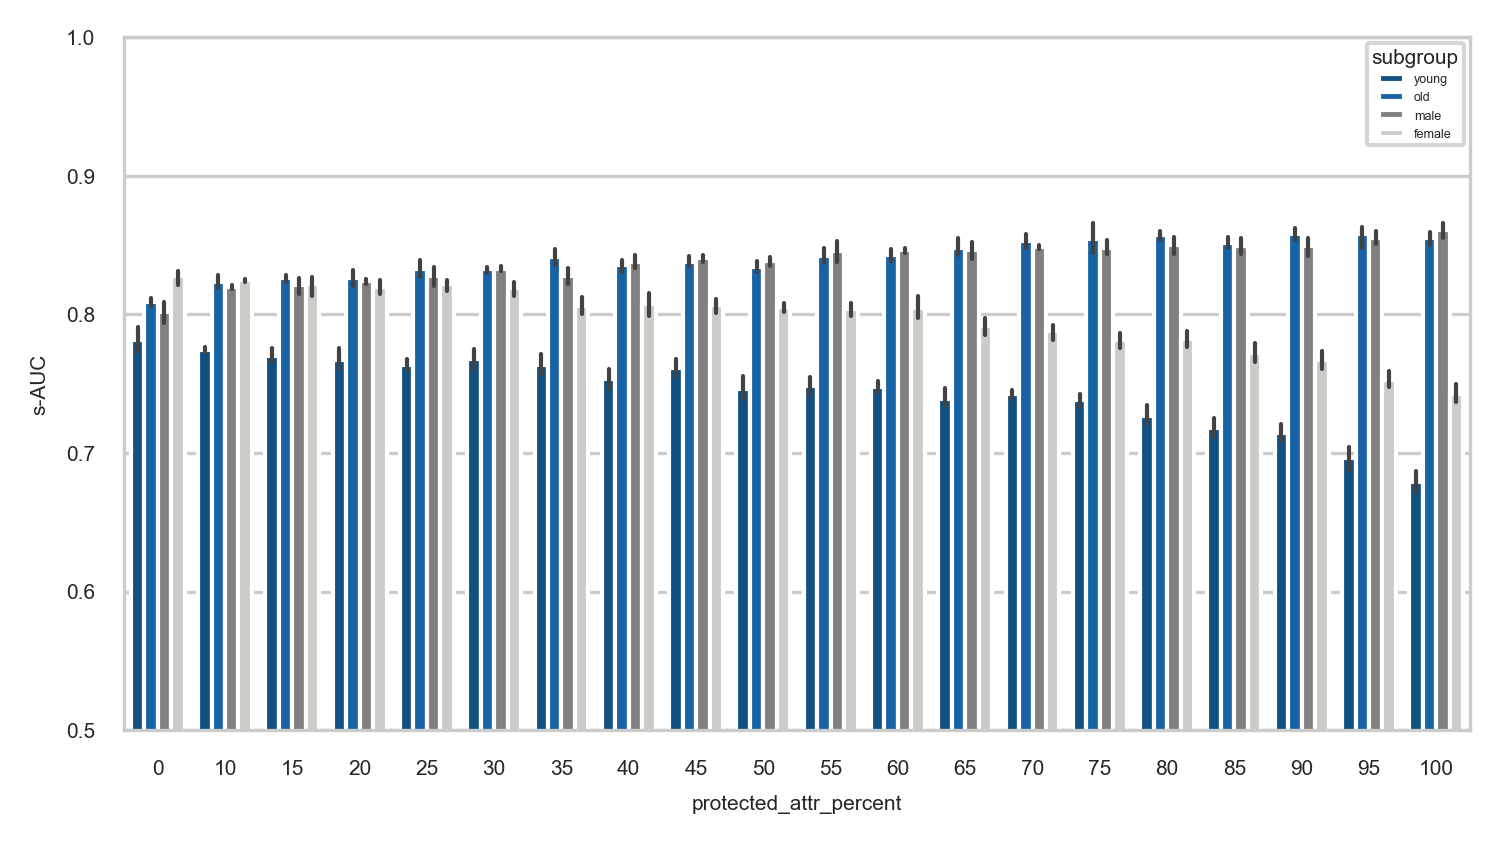

In [99]:
fontSize = 5
rc={"figure.dpi": 300, 'savefig.dpi': 300, 'axes.labelsize': fontSize, 'axes.titlesize': fontSize, 'font.size': fontSize, 'legend.fontsize': fontSize*0.6}
plt.rcParams.update(rc)
plt.figure(figsize=(5.78853, 3))
sns.barplot(data=data_normal, x="protected_attr_percent", y="s-AUC", hue="subgroup", palette=color_palette, errwidth=1)
# set ylim 
plt.ylim(0.5, 1)